<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Project-Template" data-toc-modified-id="Project-Template-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Project Template</a></span><ul class="toc-item"><li><span><a href="#Task-1" data-toc-modified-id="Task-1-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Task-1</a></span></li><li><span><a href="#Task-2" data-toc-modified-id="Task-2-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Task-2</a></span></li><li><span><a href="#Task-3" data-toc-modified-id="Task-3-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Task-3</a></span></li><li><span><a href="#Task-4" data-toc-modified-id="Task-4-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Task-4</a></span></li><li><span><a href="#Task-5" data-toc-modified-id="Task-5-1.5"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>Task-5</a></span></li><li><span><a href="#Task-6" data-toc-modified-id="Task-6-1.6"><span class="toc-item-num">1.6&nbsp;&nbsp;</span>Task-6</a></span></li><li><span><a href="#Task-7" data-toc-modified-id="Task-7-1.7"><span class="toc-item-num">1.7&nbsp;&nbsp;</span>Task-7</a></span></li><li><span><a href="#Task-8" data-toc-modified-id="Task-8-1.8"><span class="toc-item-num">1.8&nbsp;&nbsp;</span>Task-8</a></span></li></ul></li></ul></div>

# Project Template

Group Number = 7   

Group Members:
```
Names :                              Student IDs:
NAYEF ALBALAWI                       201914230
HAZEM ALSAADI                        201933990
MAJID ALMADANI                       201957950
MOHAMMAD ALTURKI                     201928610
```

## Task-1

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df = pd.read_csv('Group_07_a.csv')
print("before : ")
display(df.head())



#we can use it to see the nan valuse in each columns
# display(df.info()) 



nan_columns=df.columns[df.isna().any()] # get the columns that have missing values.

# fix the nan values

for i in nan_columns: 
    value = df[i].mean() if df[i].dtype!='object' else df[i].mode()[0] #handle the nan value using mode and mean
    df[i].fillna(value,inplace=True)   
    



# we can use it to see the data types and copmare it with the table in the PDF file to see the inconsistencies
# display(df.dtypes) 



df.drop(["0"] , axis= 1,inplace = True) # we drop the first column becouse it is not useable for us.


# fix the inconsistencies

df['Store ID']=df['Store ID'].apply(lambda x: int(x.replace('fil-',''))) # changing the id from categorical to numrical.
df['Work Hours']=df['Work Hours'].apply(lambda x: int(x.replace('hrs',''))) # changing the Work hours from categorical to numrical.
df['Cost/day']=df['Cost/day'].apply(lambda x: float(x.replace('SAR',''))) # changing the Cost/day from categorical to numrical.
df['Profit/day']=df['Profit/day'].apply(lambda x: float(x.replace('SAR',''))) # changing the Profit/day from categorical to numrical.


# fix the outliers

days={'Sat' :'Saturday','Sun':'Sunday','Mon':'Monday','Tue':'Tuesday','Wed':'Wednesday','Thu':'Thursday','Fri':'Friday'} #to fix the days names    
month = {'Jun':'June', 'Jul':'July', 'Aug': 'August', 'Sep':'September'
         ,'Oct': 'October', 'Nov':'November','Dec':'December',
       'Jan':'January', 'Feb':'February', 'Mar':'March', 'Apr':'April'} #to fix the months names

df['Day']= df['Day'].apply(lambda x: days[x] if x in list(days.keys()) else x ) #fix the days names 
df['Greg. Month']= df['Greg. Month'].apply(lambda x: month[x] if x in list(month.keys()) else x ) #fix the months names



# for all numrical columns the number must be positive

num_col = df.select_dtypes(exclude='object').columns
for i in num_col:
    df[i]=df[i].apply(lambda x: x if x>=0 else abs(x)) # change any negative number to positive
    


print("after : ")
display(df.head())


before : 


0 Store ID       Gregorian Date  Hijri Date      Day Greg. Month  \
0  0  fil-701  2015-05-05 00:00:00  1436-07-16  Tuesday         May   
1  1  fil-702  2015-05-05 00:00:00  1436-07-16  Tuesday         May   
2  2  fil-703  2015-05-05 00:00:00  1436-07-16      NaN         May   
3  3  fil-704  2015-05-05 00:00:00  1436-07-16  Tuesday         May   
4  4  fil-705  2015-05-05 00:00:00  1436-07-16      NaN         May   

  Hijri Month   Location Store Size  Parking Mall Work Hours      Cost/day  \
0       Rajab     Center      Hyper      675   No     12 hrs   SAR 38532.0   
1       Rajab  Outskirts    Regular     1075  Yes     12 hrs    SAR 4670.0   
2       Rajab     Border     Grande     2725  Yes     12 hrs  SAR 593759.0   
3       Rajab     Center    Regular      205   No     12 hrs    SAR 8241.0   
4       Rajab     Center      Hyper      760   No     24 hrs   SAR 41540.0   

  Promotion  Customer Base  Advertisements  Competition  Customers  \
0      None        1219360               0           10      17607   
1      None         132851               0            1       1542   
2      None         649943               0            1       9372   
3      None         967411               0            8      13112   
4      None        1271226               0            6      18670   

    Profit/day  
0   SAR 874908  
1    SAR 76118  
2   SAR 476067  
3   SAR 637833  
4  SAR 1020849

after : 


Store ID       Gregorian Date  Hijri Date      Day Greg. Month Hijri Month  \
0       701  2015-05-05 00:00:00  1436-07-16  Tuesday         May       Rajab   
1       702  2015-05-05 00:00:00  1436-07-16  Tuesday         May       Rajab   
2       703  2015-05-05 00:00:00  1436-07-16  Tuesday         May       Rajab   
3       704  2015-05-05 00:00:00  1436-07-16  Tuesday         May       Rajab   
4       705  2015-05-05 00:00:00  1436-07-16  Tuesday         May       Rajab   

    Location Store Size  Parking Mall  Work Hours  Cost/day Promotion  \
0     Center      Hyper      675   No          12   38532.0      None   
1  Outskirts    Regular     1075  Yes          12    4670.0      None   
2     Border     Grande     2725  Yes          12  593759.0      None   
3     Center    Regular      205   No          12    8241.0      None   
4     Center      Hyper      760   No          24   41540.0      None   

   Customer Base  Advertisements  Competition  Customers  Profit/day  
0        1219360               0           10      17607    874908.0  
1         132851               0            1       1542     76118.0  
2         649943               0            1       9372    476067.0  
3         967411               0            8      13112    637833.0  
4        1271226               0            6      18670   1020849.0

## Task-2

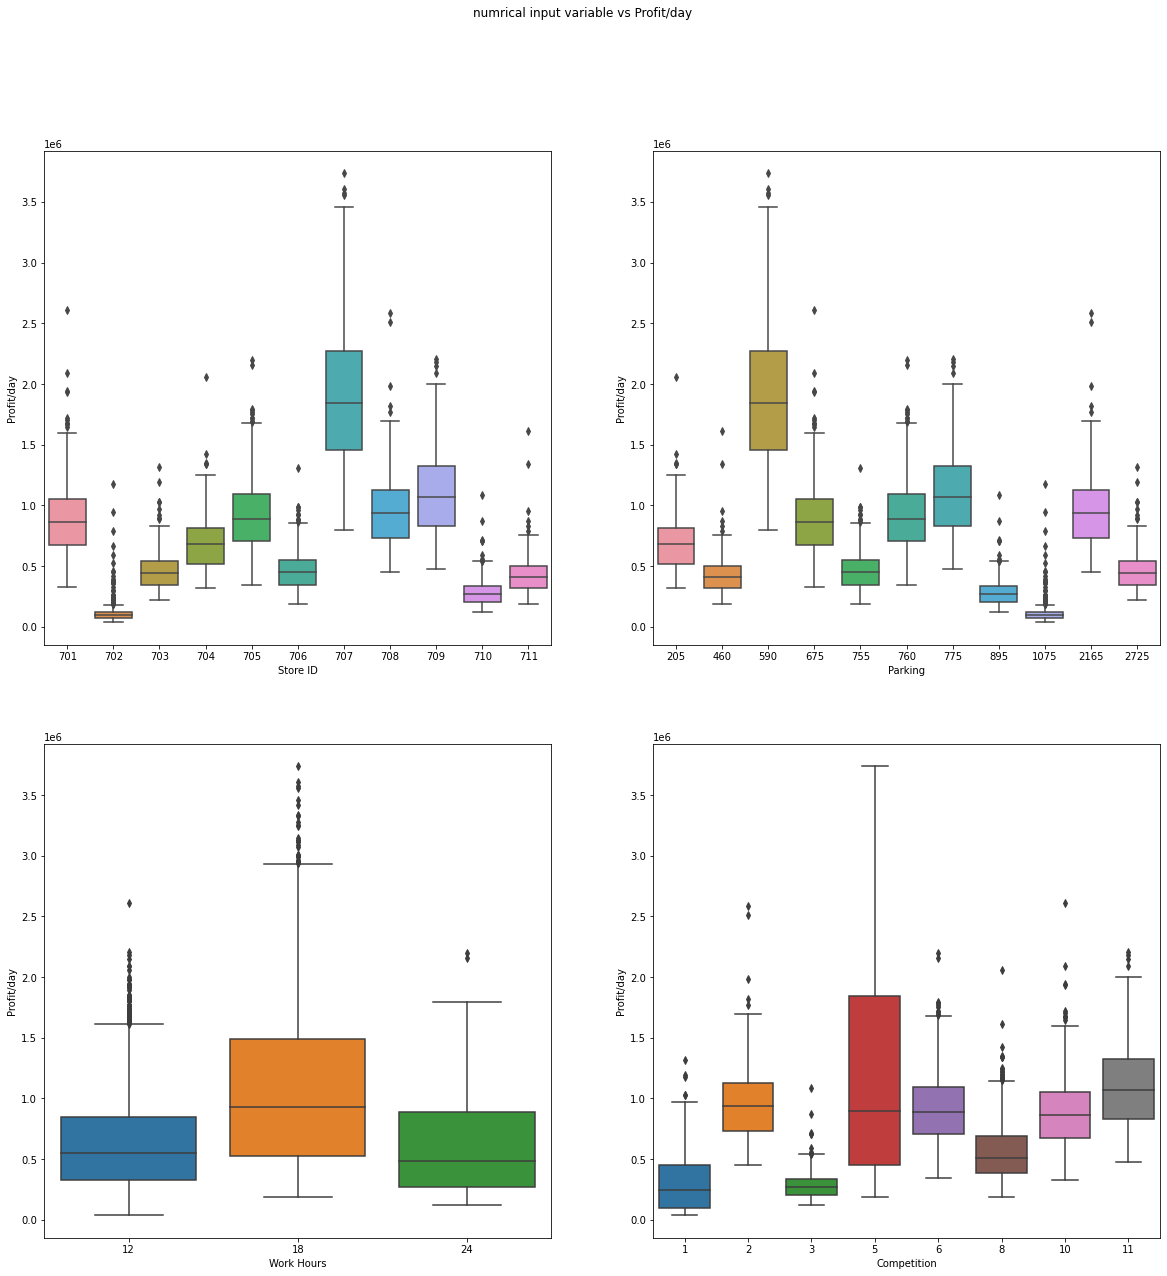

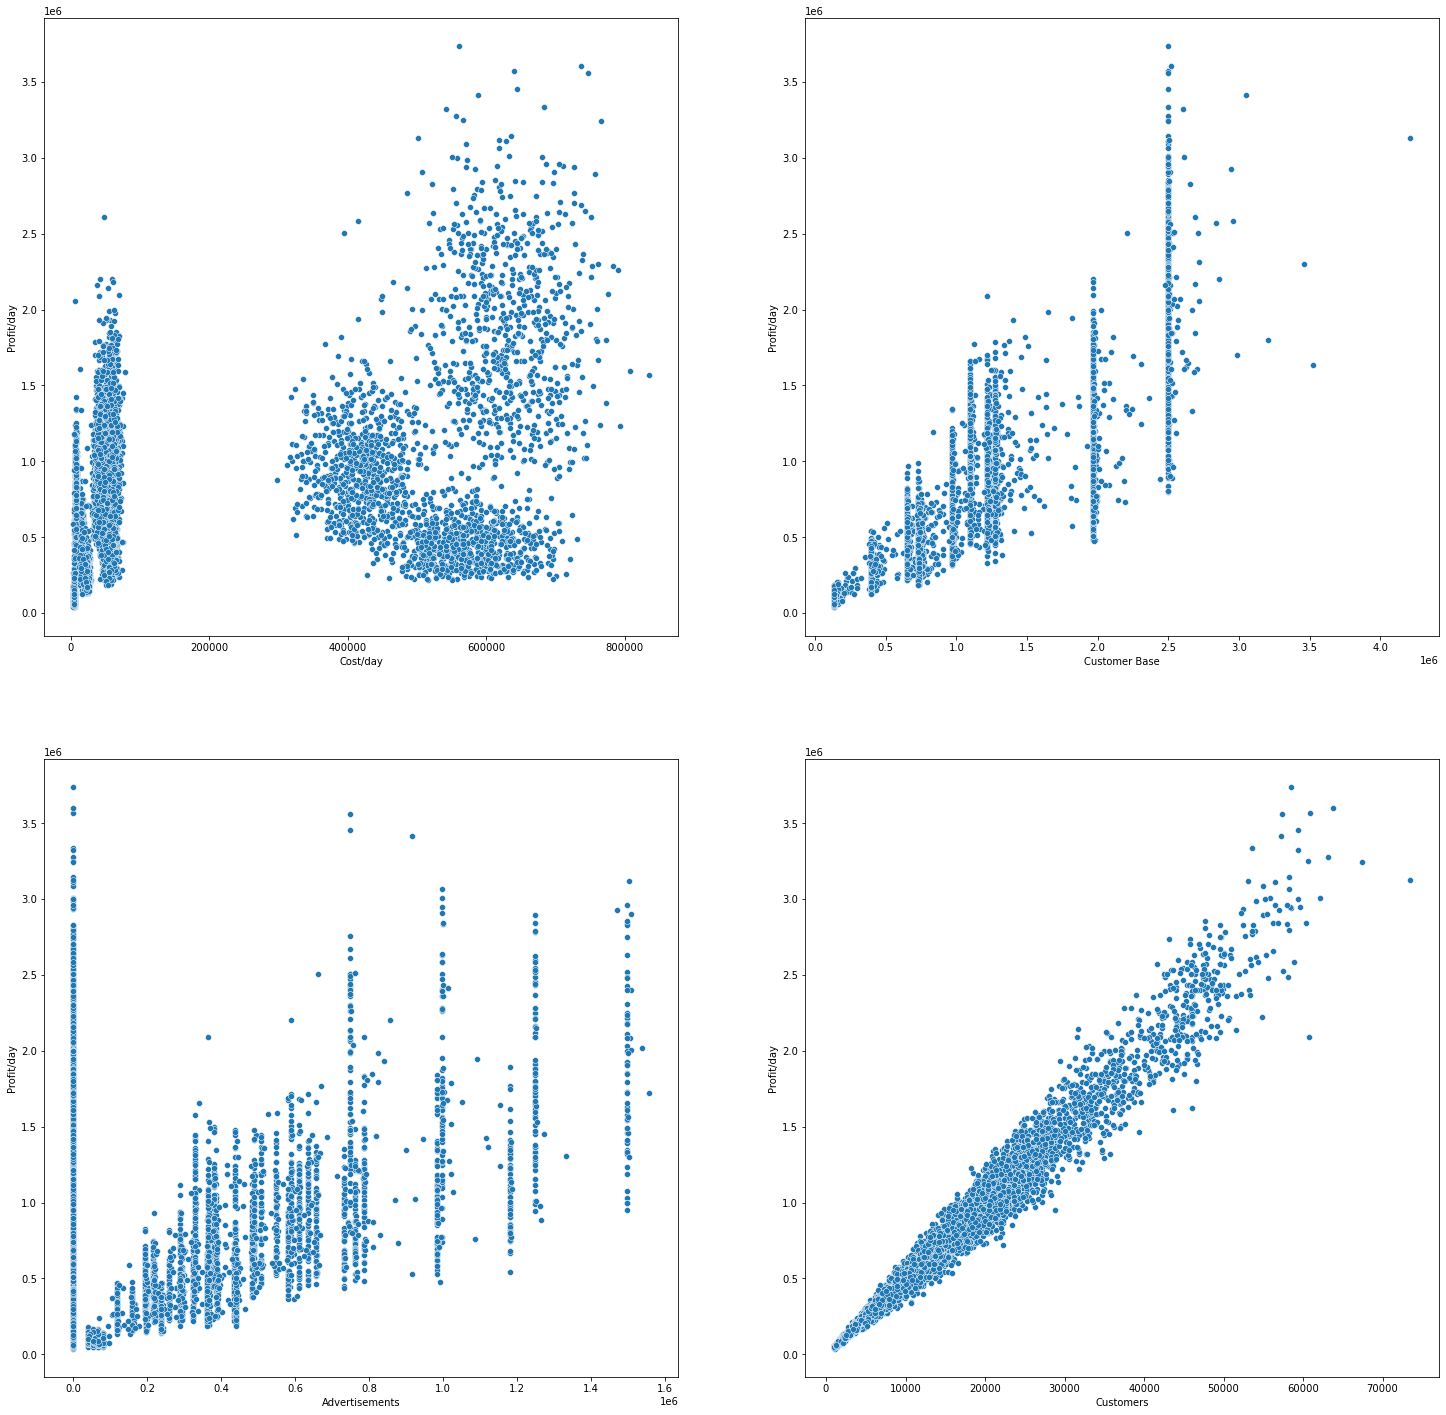

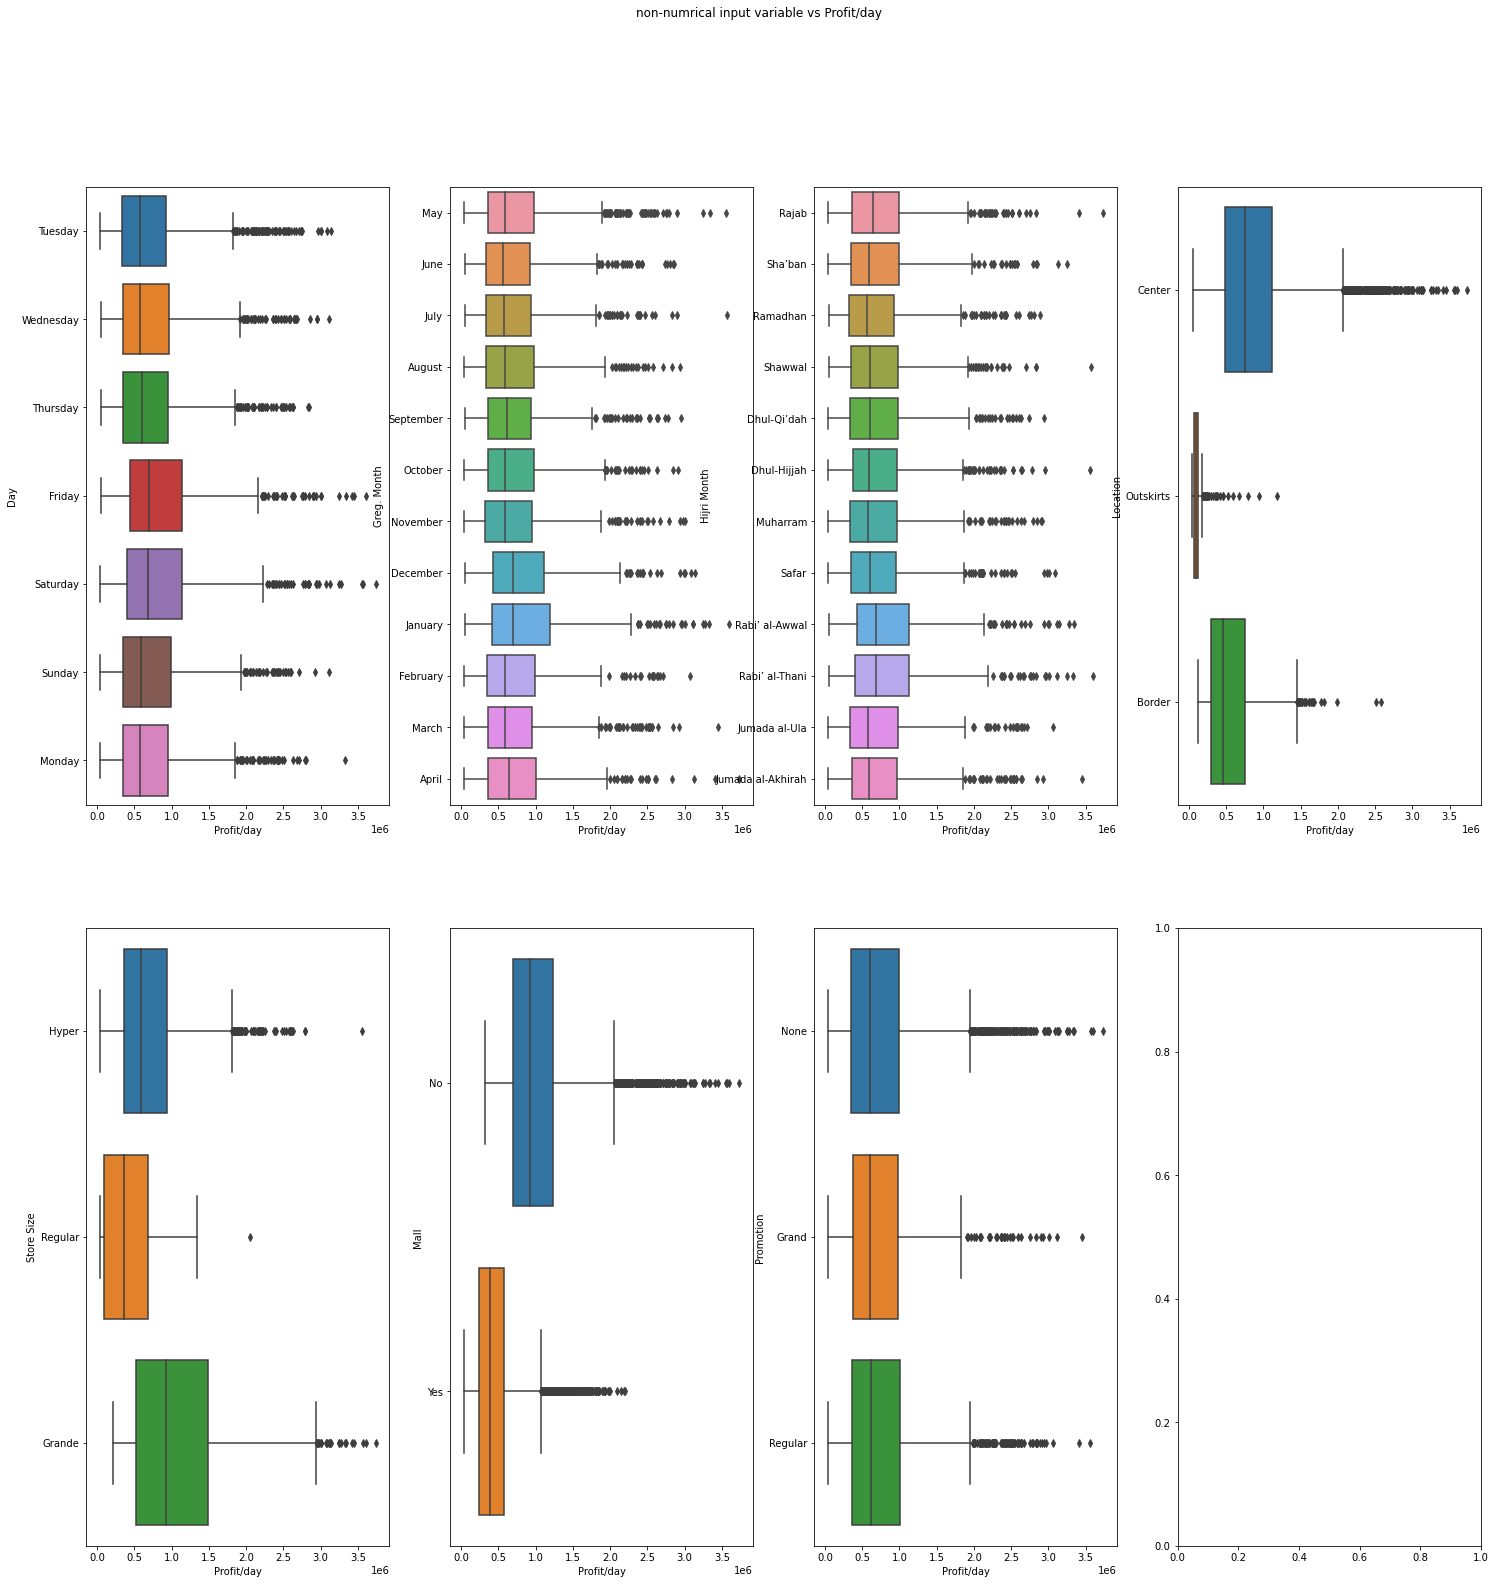

In [2]:
import matplotlib.pyplot as plt 
import seaborn as sns


## i have use boxplot for some of the numrical columns becouse it contain less unique values so it can be visualise more easly .
nCols=2
num_col = df[["Store ID","Parking","Work Hours","Competition"]].columns
nRows=len(num_col)//nCols
fig,axes = plt.subplots(nRows, nCols, figsize=(20,20))
for i,k in enumerate(num_col) :
    sns.boxplot(x=k, y="Profit/day",data=df,ax = axes.flatten()[i])
fig.suptitle('numrical input variable vs Profit/day ')
plt.show() 

nCols=2
num_col=df.select_dtypes(exclude = "object").drop(columns =["Profit/day","Store ID","Parking","Work Hours","Competition"]).columns
nRows=len(num_col)//nCols
fig,axes = plt.subplots(nRows, nCols, figsize=(25,25))
for i,k in enumerate(num_col) :
    sns.scatterplot(x=k, y="Profit/day",data=df,ax = axes.flatten()[i])
plt.show() 


nCols=4
cat_columns = df.select_dtypes(include = "object").columns.drop(["Gregorian Date","Hijri Date"])
nRows=len(cat_columns)//nCols+1 

fig,axes = plt.subplots(nRows, nCols, figsize=(25,25))
for i,k in enumerate(cat_columns):
    sns.boxplot(y=k, x="Profit/day",data=df,ax = axes.flatten()[i])
fig.suptitle('non-numrical input variable vs Profit/day ')
plt.show()
 

## Task-3

In [3]:
corr = df.select_dtypes(exclude = "object").corr(method="pearson")
corr = np.abs(corr).sort_values(by = ["Profit/day"],ascending=False)
print("top three numerical variables that are strongly related to the profit variable are : ")
display(corr.iloc[1:4,-1])

top three numerical variables that are strongly related to the profit variable are : 


Customers        0.985376
Customer Base    0.851640
Cost/day         0.465634
Name: Profit/day, dtype: float64

## Task-4

<ipython-input-4-4643331ec9c0>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_data['PCA1'] = principalComponents[:,0]
<ipython-input-4-4643331ec9c0>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_data['PCA2'] = principalComponents[:,1]
<ipython-input-4-4643331ec9c0>:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pand

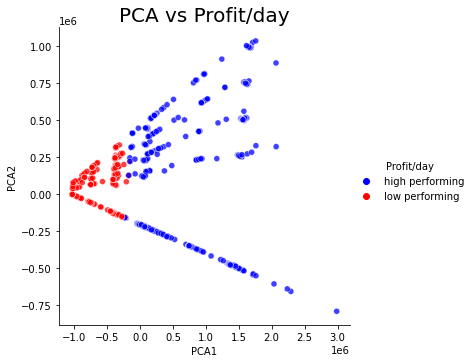

the input column shows a good sepration for low and high performing


In [4]:
from sklearn.decomposition import PCA

## to ecode the non-numrical columns so i can use it in PCA.
ndf = df.copy()

ndf["Day"] =ndf["Day"].map(dict(zip(ndf["Day"].unique().tolist(),[4,5,6,7,1,2,3])))  ##custom  ecoder for dayes depending in the order of them starting from saturday and ending at friday so i can use it in PCA.
ndf["Greg. Month"] = ndf["Greg. Month"].map({"January":1, "February":2, "March":3, "April":4, "May":5, "June":6, "July":7, "August":8, "September":9, "October":10, "November":11, "December":12}) ##custom  ecoder for Greg. Month depending in the order of them starting from January and ending at December so i can use it in PCA.
ndf["Hijri Month"] = ndf["Hijri Month"].map(dict(zip(ndf["Hijri Month"].unique().tolist(),[7,8,9,10,11,12,1,2,3,4,5,6]))) ##custom  ecoder for Hijri Month depending in the order of them starting from Muharram and ending at Thul-Hijjah so i can use it in PCA.
ndf["Location"] = ndf["Location"].map({"Center":1,"Border":2,"Outskirts":3})##custom  ecoder that have an order which i think it is a good order for unique values of Location so i can use it in PCA.
ndf["Store Size"] = ndf["Store Size"].map({"Regular":1,"Hyper":2,"Grande":3})##custom  ecoder that have an order which i think it is a good order for unique values of Store Size so i can use it in PCA.

#label ecoder for yes and no in Mall Column to 1 and 0 so i can use it in PCA.
from sklearn.preprocessing import LabelEncoder
encoder1 = LabelEncoder()
encoder1.fit(ndf['Mall'])
ndf['Mall']=encoder1.transform(ndf['Mall'])
ndf["Promotion"] = ndf["Promotion"].map({"Regular":2,"None":1,"Grand":3})##custom  ecoder that have an order which i think it is a good order for unique values of Promation so i can use it in PCA.



import seaborn as sns
q1,q3 = np.percentile(ndf["Profit/day"],[25,75])
selected_rows = (ndf["Profit/day"]<q1) | ((ndf["Profit/day"]>q3))
selected_data = ndf.loc[selected_rows,:]
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(selected_data.select_dtypes(exclude = "object").drop(columns = ["Profit/day"]))
selected_data['PCA1'] = principalComponents[:,0]
selected_data['PCA2'] = principalComponents[:,1]
selected_data["Profit/day"] = selected_data["Profit/day"].apply(lambda x:"low performing" if x<q1 else "high performing"   )
sns.relplot(x='PCA1',y='PCA2',hue='Profit/day',hue_order=["high performing","low performing"], palette=dict(zip(["high performing","low performing"],["b","r"])),kind='scatter',alpha=0.75,height=5, aspect=1,data=selected_data)
plt.title('PCA vs Profit/day', fontsize = 20)
plt.show()

print("the input column shows a good sepration for low and high performing")


## Task-5

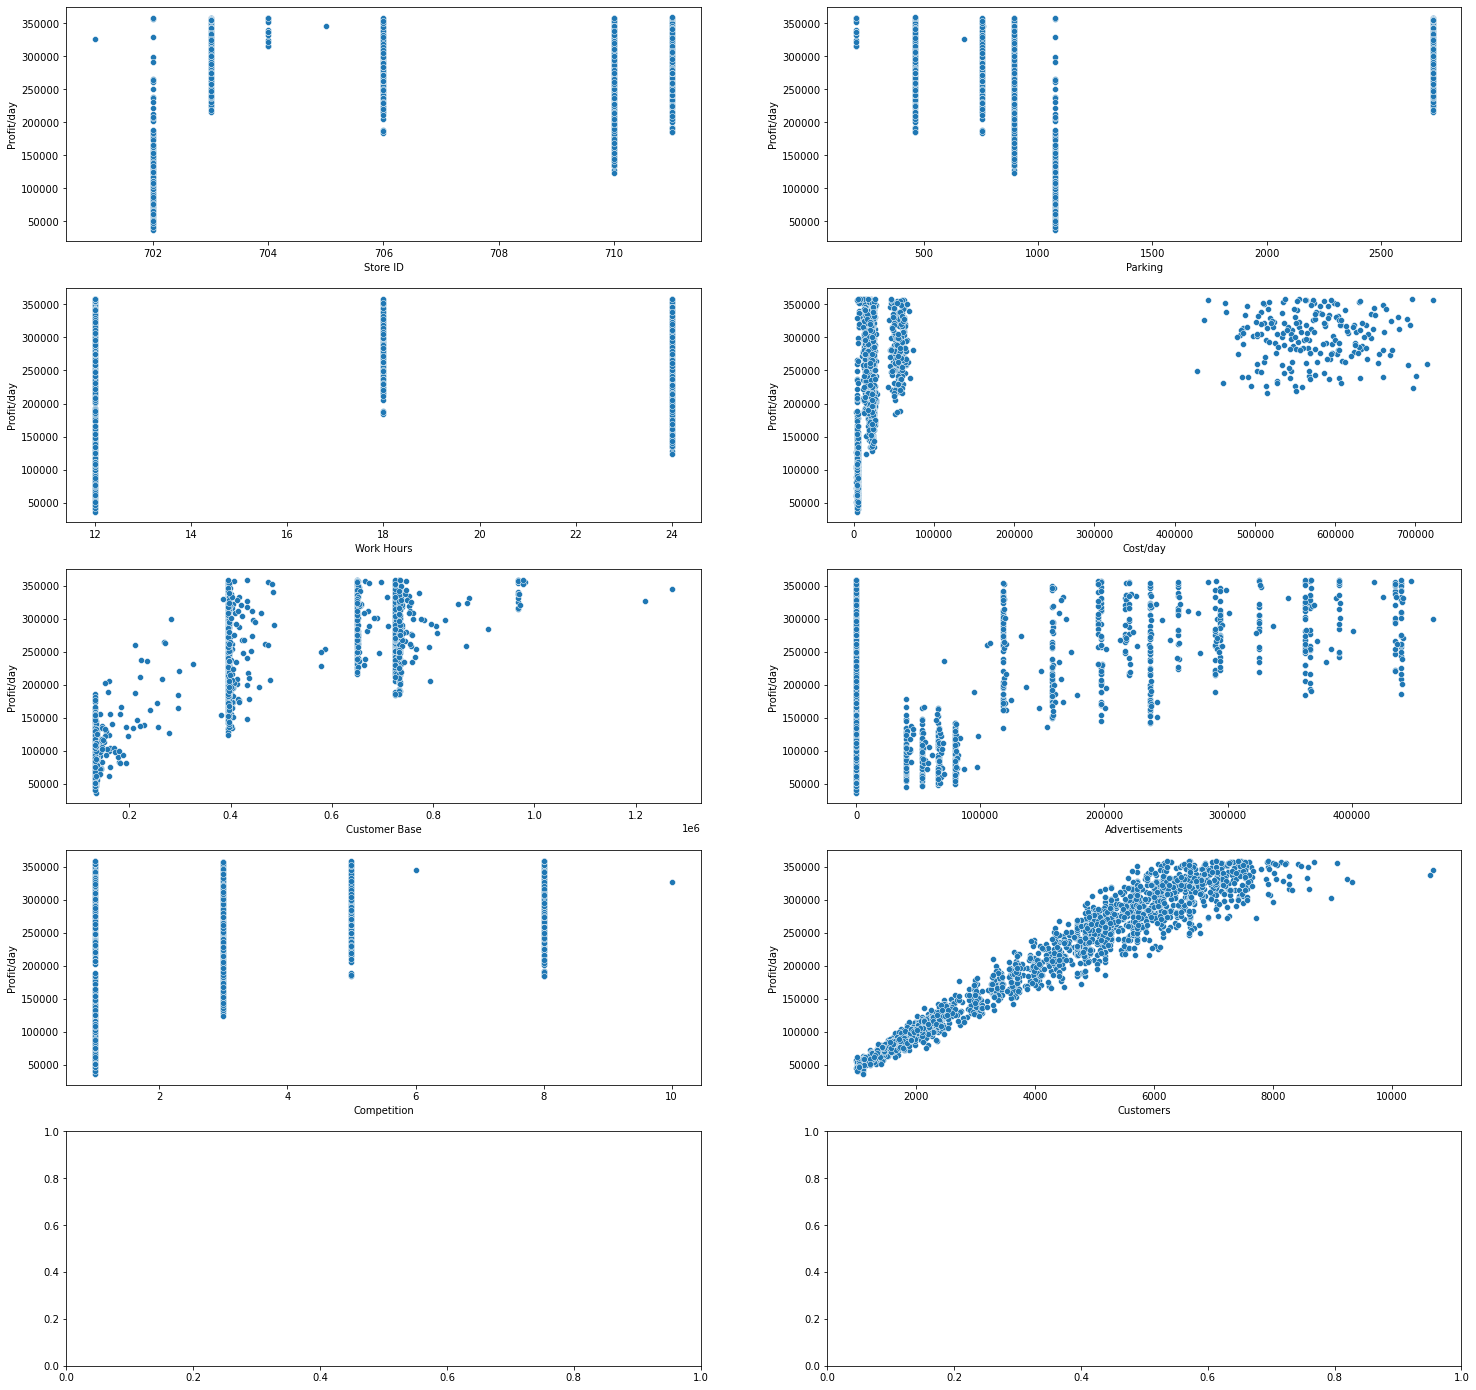

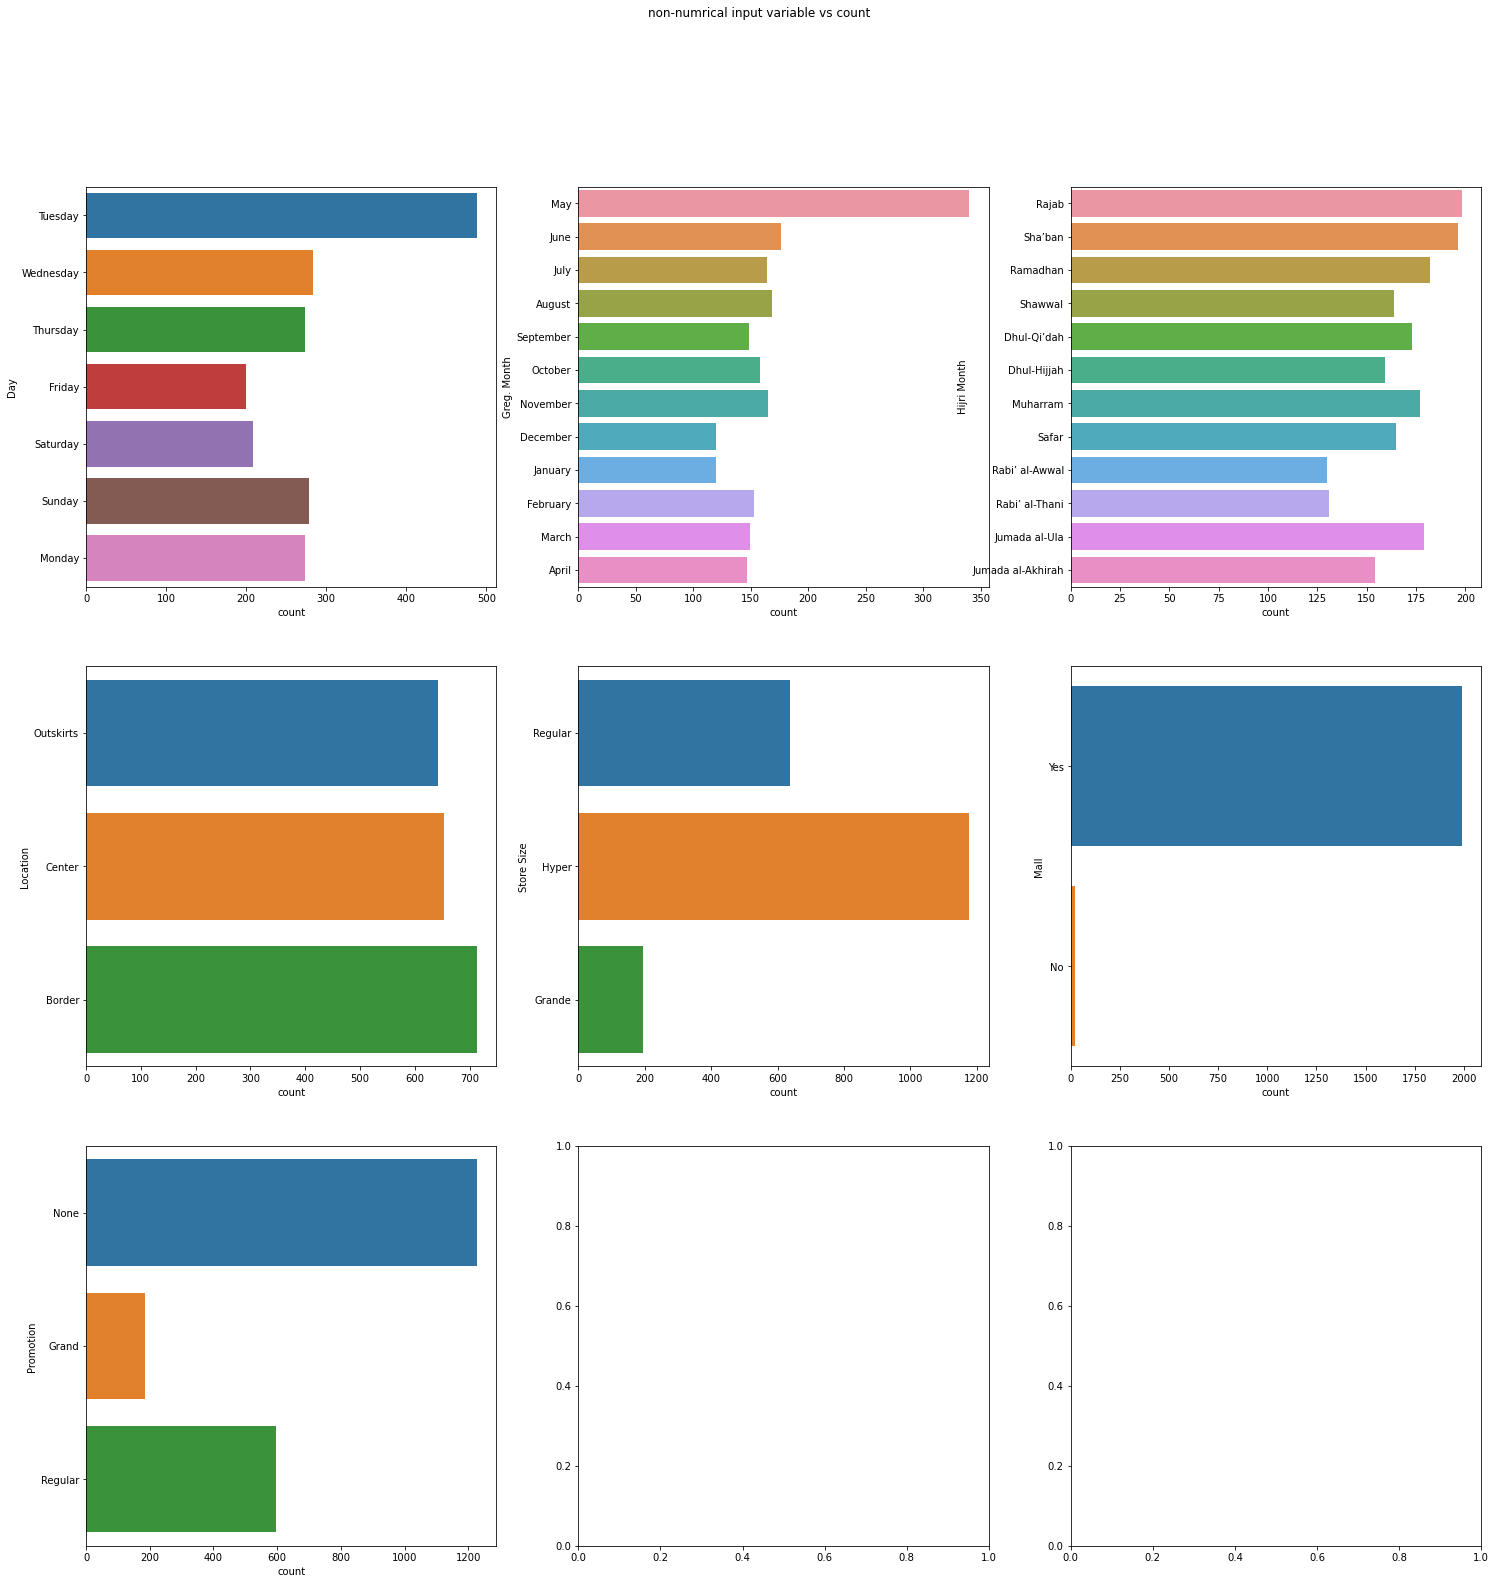

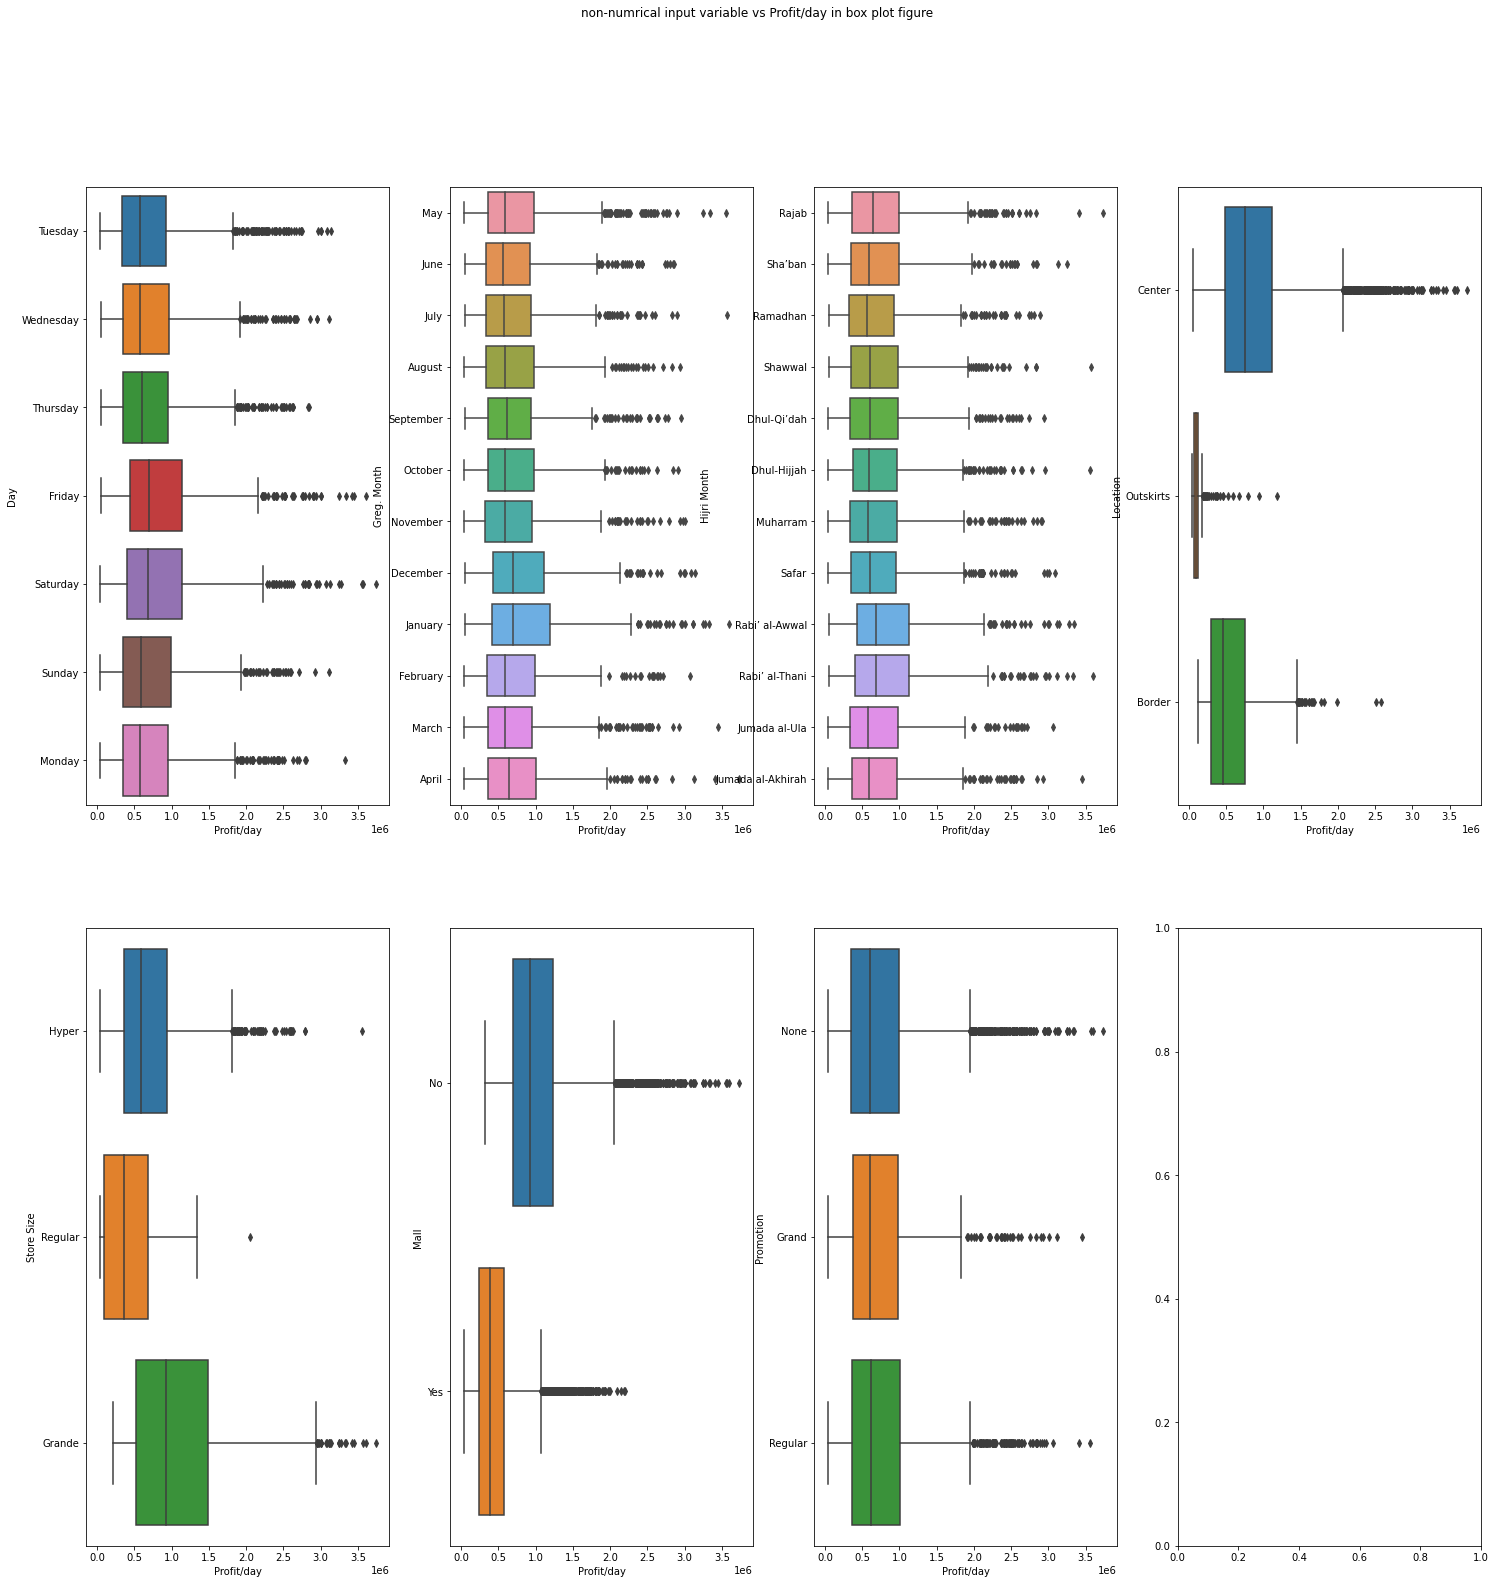

a.s we can see clearly  that the common pattern  store  are in the mall but the profit does not come from malls  and for the size we can see that most stores  are   hyper store size but the most profitable is the grande
and for the location, a common pattern for it is   the center 
and Greg month we can see that may is top in the pattern but the most profitable is the month and for Hijri month we can see rabi alawwal and rabi al-Thani are almost tied
and the best day for the sales was Friday and Saturday
we can see the parking can affect in a positive way the profit days and the most pattern size was from 750-1000
we can from the cost day that the most common pattern was from 0 to almost 10000
we can see from the customer base that the average from 0.6 to 0.8 and then  for customers as the number increases the profit increases and we can determine a clear pattern 
for competition, we can  know from the data and see that the usual competition  is less than 2
to conclude, low-performance

In [5]:
import seaborn as sns

from matplotlib import pyplot as plt

q1,q3 = np.percentile(df["Profit/day"],[25,75])

selected_rows = (df["Profit/day"]<q1)


#we spatrate the catagoray to draw the figure easily 
num_col=df.select_dtypes(exclude = "object").drop(columns =["Profit/day"]).columns

nCols=2

nRows=len(num_col)//nCols +1

ndf = df.loc[selected_rows,df.select_dtypes(exclude = "object").columns]

fig,axes = plt.subplots(nRows, nCols, figsize=(25,25))

#display(ndf)

#we draw each colum spartatly so we can get the data 
#we use the sccater to see the plot clearly 
for i,k in enumerate(num_col) :
    sns.scatterplot(x=k,y="Profit/day",data=ndf,ax = axes.flatten()[i],palette=['r','b','g','m','c'])
plt.show() 



#display(num_col)

nCols=3

cat_columns2 = df.select_dtypes(include = "object").columns.drop(["Gregorian Date","Hijri Date"])# we dropped the grag days and hijri days  because it hard to know the day and to deffult to understand the figure

nRows=len(cat_columns2)//nCols+1 

ndf = df.loc[selected_rows,df.select_dtypes(include = "object").columns]

ndf["Profit/day"]=df["Profit/day"]

fig,axes = plt.subplots(nRows, nCols, figsize=(25,25))

for i,k in enumerate(cat_columns2):
    
    sns.countplot(y=k,data=ndf,ax = axes.flatten()[i])

fig.suptitle('non-numrical input variable vs count ')
plt.show()

#we them draw twice so we get accurate data  



nCols=4
cat_columns = df.select_dtypes(include = "object").columns.drop(["Gregorian Date","Hijri Date"])
nRows=len(cat_columns)//nCols+1 

fig,axes = plt.subplots(nRows, nCols, figsize=(25,25))
for i,k in enumerate(cat_columns):
    sns.boxplot(y=k, x="Profit/day",data=df,ax = axes.flatten()[i])
fig.suptitle('non-numrical input variable vs Profit/day in box plot figure  ')
plt.show()


print("""a.s we can see clearly  that the common pattern  store  are in the mall but the profit does not come from malls  and for the size we can see that most stores  are   hyper store size but the most profitable is the grande
and for the location, a common pattern for it is   the center 
and Greg month we can see that may is top in the pattern but the most profitable is the month and for Hijri month we can see rabi alawwal and rabi al-Thani are almost tied
and the best day for the sales was Friday and Saturday
we can see the parking can affect in a positive way the profit days and the most pattern size was from 750-1000
we can from the cost day that the most common pattern was from 0 to almost 10000
we can see from the customer base that the average from 0.6 to 0.8 and then  for customers as the number increases the profit increases and we can determine a clear pattern 
for competition, we can  know from the data and see that the usual competition  is less than 2
to conclude, low-performance stores are in the mall and the size of them was hyper and for location, we can see that the border stores are slightly common for low-performance and we can see the cost of the day range from 0-100000 and customer base that the around the 0.6 to 0.8  and the competition it was less than 2""")

## Task-6

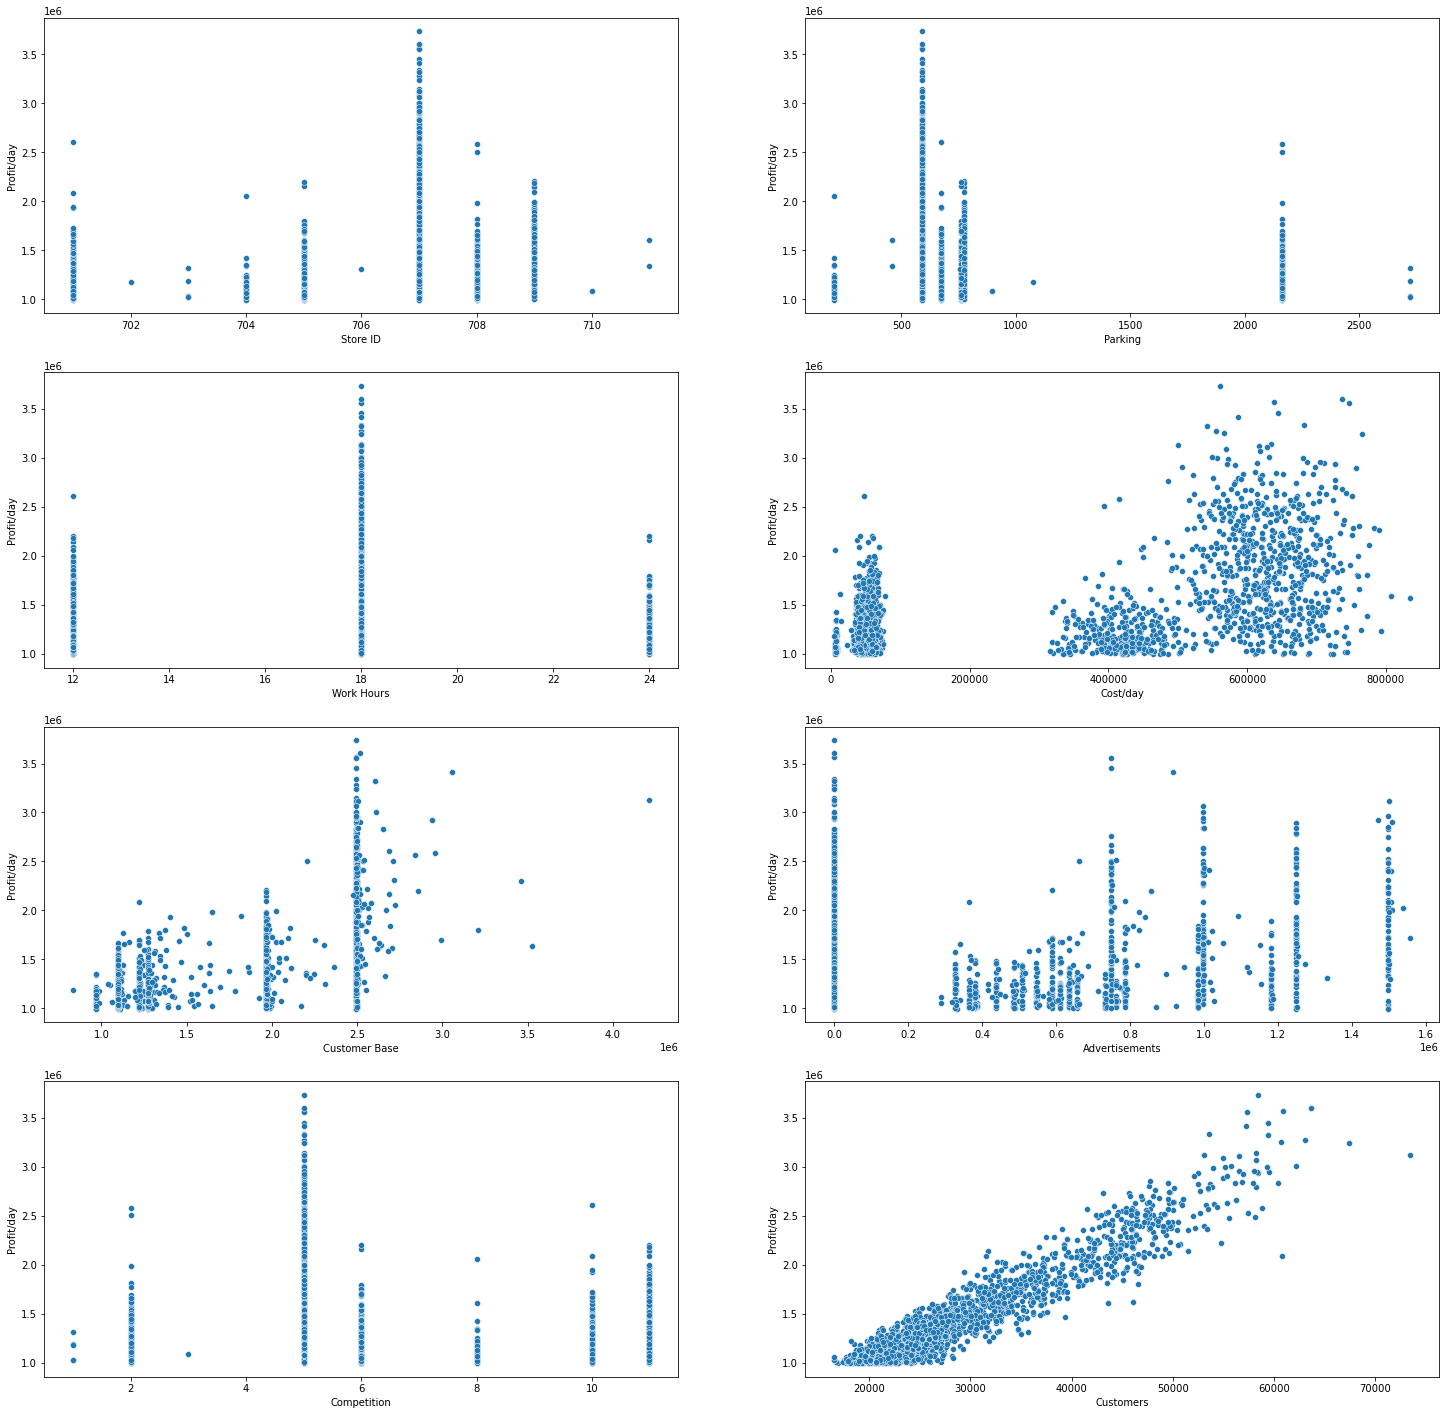

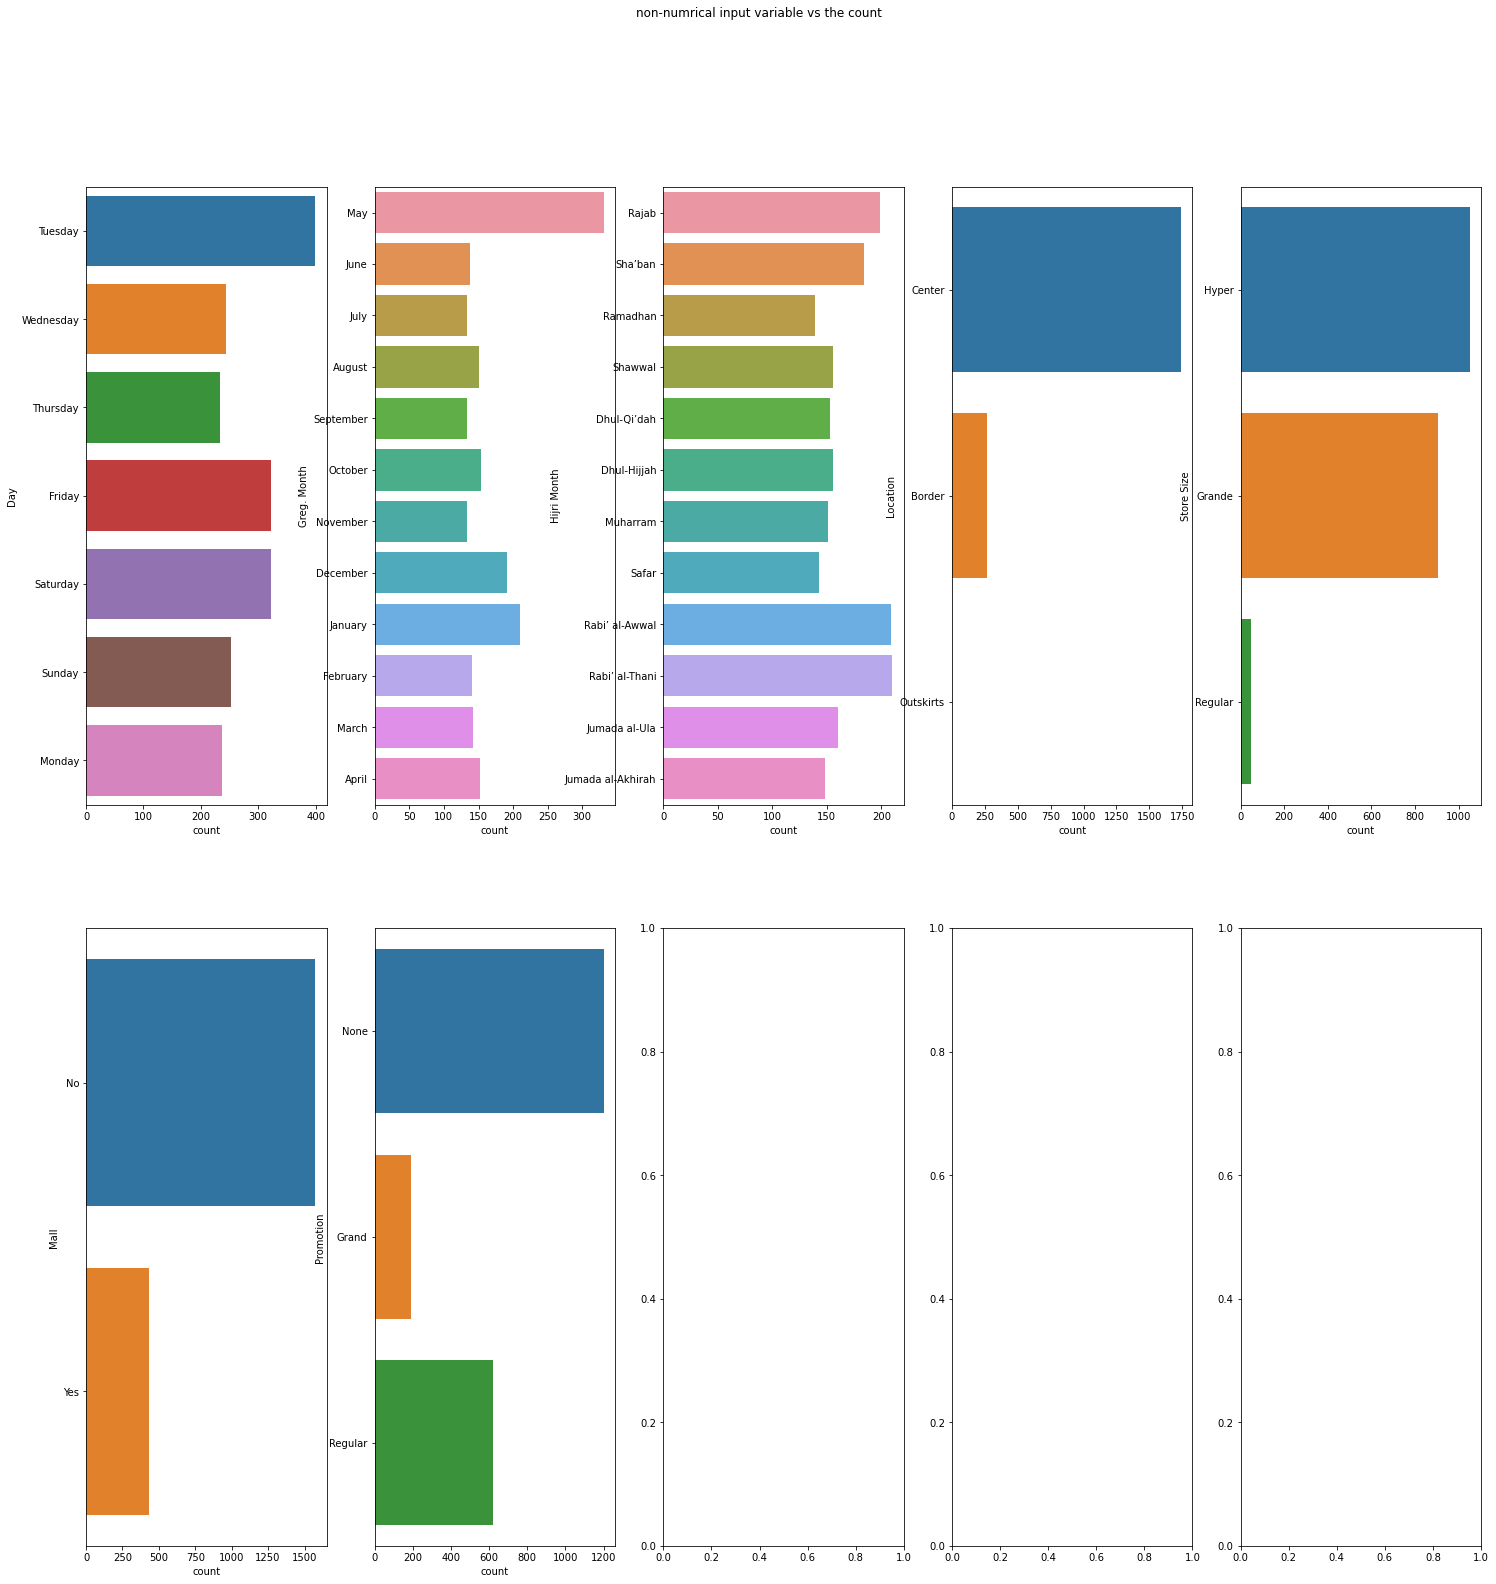

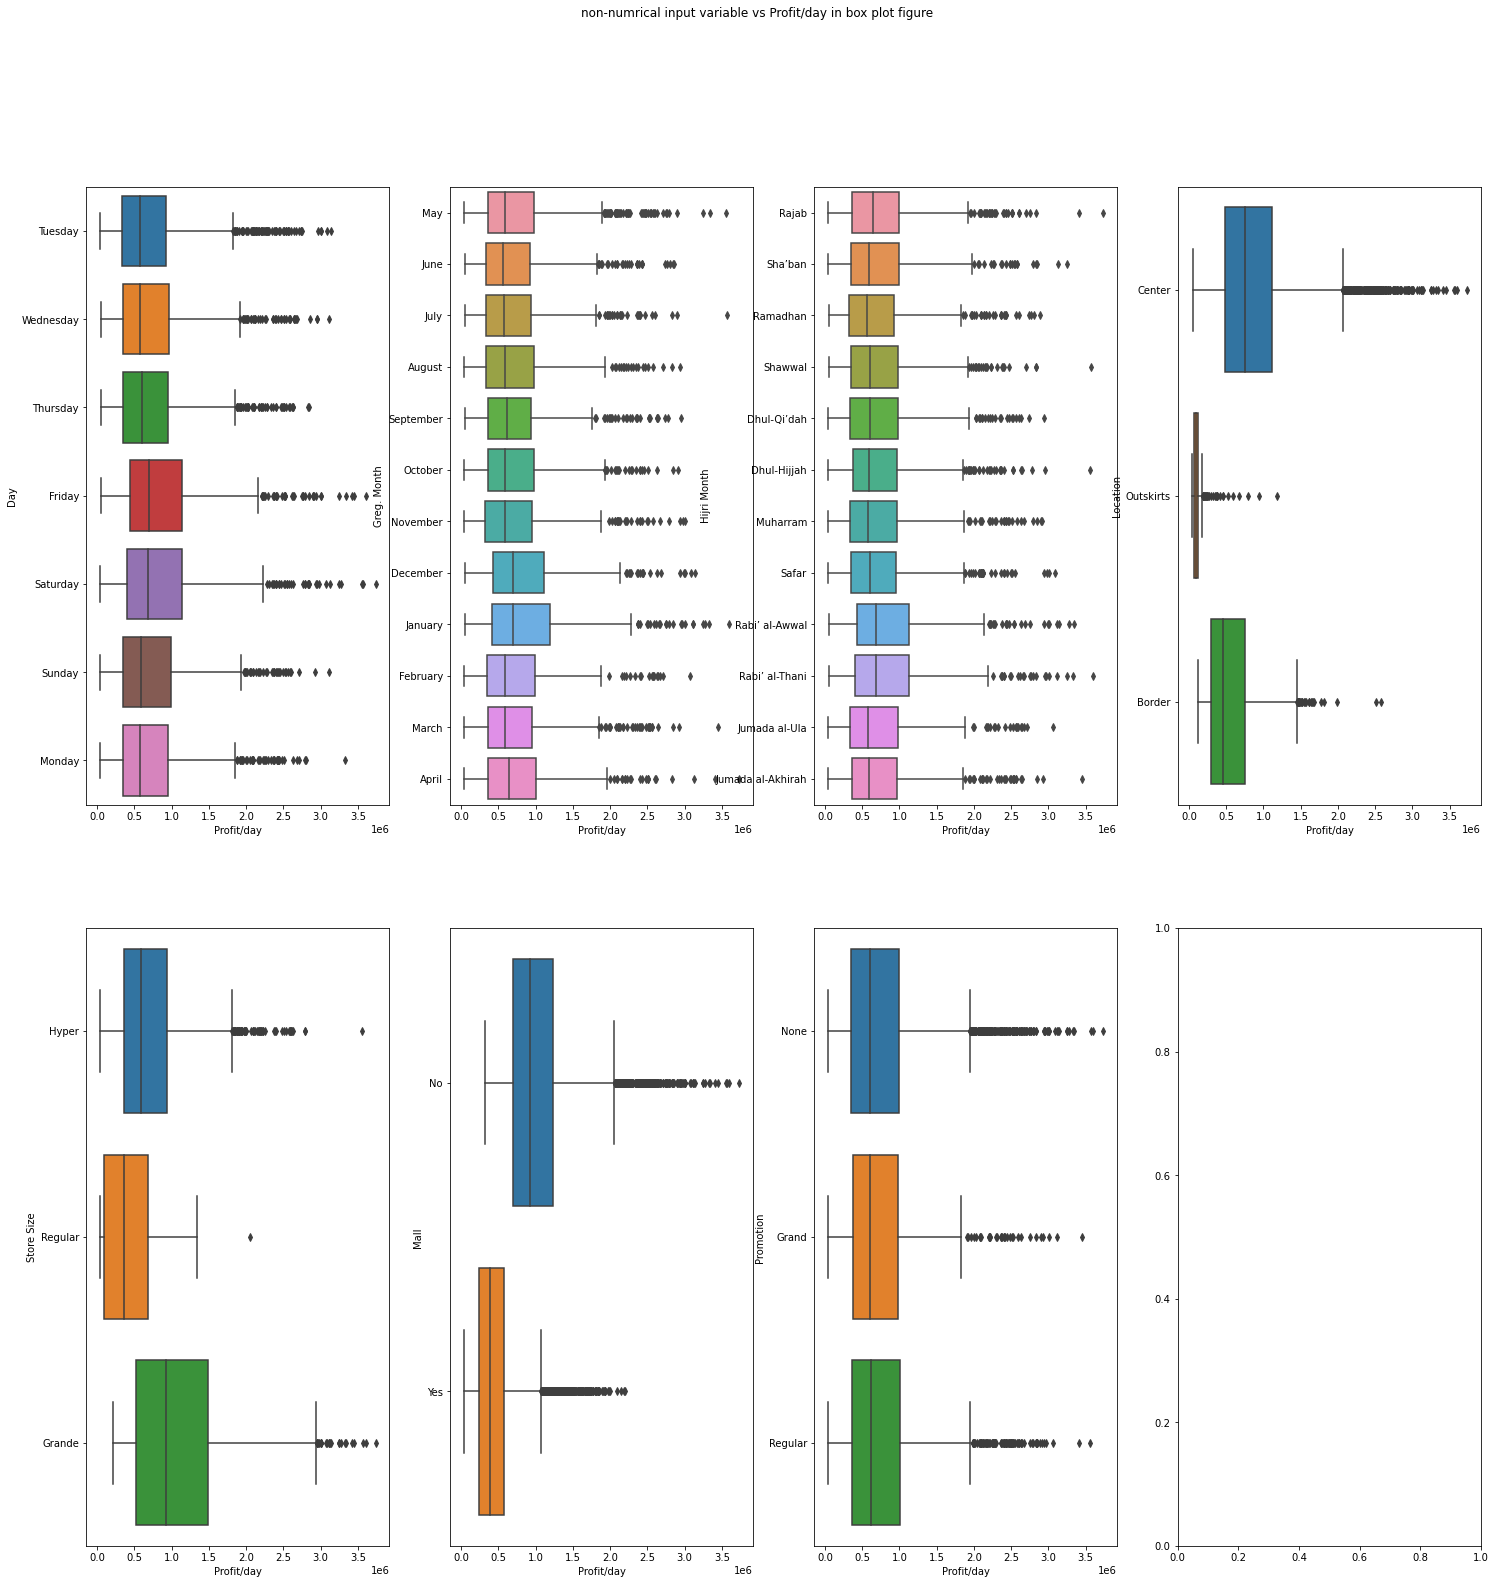

for id, the common pattern was  707, 
we can see that the pattern for the parking was from 500 to 1000 
 for work hours the figure showed that most of them work for  18
 the cost we see  that the pattern was in the range of 600000 and the 
, customer base indicates that the common pattern was from 1 to 1.5,
 and for customers, the pattern was in the range of 20000 
 the competition was titted and we can't get valuable data, 
Tuesday, Friday, and Saturday were the common days. however, for  Greg month we can see that the most common month was may and Hijri was rabi al awwal and rabi al Thani
for the location, the data indicated that most of the stores were incenter
the data shows that the store was hyper and  we can see that the common patterns were not in the mall
the  marketing figure pointed that  a large number of sores  do not market themself
to conclude, we can say the pattern was 707 for id and the range of parking  from above 500 to 1000 and the cost around 600000 and for the da

In [6]:
#import seaborn as sns
q1,q3 = np.percentile(df["Profit/day"],[25,75])

selected_rows = (df["Profit/day"]>q3)



num_col=df.select_dtypes(exclude = "object").drop(columns =["Profit/day"]).columns

nCols=2

nRows=len(num_col)//nCols

ndf = df.loc[selected_rows,df.select_dtypes(exclude = "object").columns] 

fig,axes = plt.subplots(nRows, nCols, figsize=(25,25))



for i,k in enumerate(num_col) :
    sns.scatterplot(x=k,y="Profit/day",data=ndf,ax = axes.flatten()[i]) #we use the sccater to see the plot clearly 
plt.show()

fig.suptitle('numrical input variable vs Profit/day  ')


nCols=5

cat_columns2 = df.select_dtypes(include = "object").columns.drop(["Gregorian Date","Hijri Date"]) # we dropped the grag days and hijri days  because it hard to know the day and to deffult to understand the figure 

nRows=len(cat_columns)//nCols+1 

ndf = df.loc[selected_rows,df.select_dtypes(include = "object").columns]

ndf["Profit/day"]=df["Profit/day"]

fig,axes = plt.subplots(nRows, nCols, figsize=(25,25))

for i,k in enumerate(cat_columns2):
    
    sns.countplot(y=k,data=ndf,ax = axes.flatten()[i])

fig.suptitle('non-numrical input variable vs the count ')
plt.show()


#we them draw twice so we get accurate data  



nCols=4
cat_columns = df.select_dtypes(include = "object").columns.drop(["Gregorian Date","Hijri Date"])
nRows=len(cat_columns)//nCols+1 

fig,axes = plt.subplots(nRows, nCols, figsize=(25,25))
for i,k in enumerate(cat_columns):
    sns.boxplot(y=k, x="Profit/day",data=df,ax = axes.flatten()[i])
fig.suptitle('non-numrical input variable vs Profit/day in box plot figure  ')
plt.show()
print("""for id, the common pattern was  707, 
we can see that the pattern for the parking was from 500 to 1000 
 for work hours the figure showed that most of them work for  18
 the cost we see  that the pattern was in the range of 600000 and the 
, customer base indicates that the common pattern was from 1 to 1.5,
 and for customers, the pattern was in the range of 20000 
 the competition was titted and we can't get valuable data, 
Tuesday, Friday, and Saturday were the common days. however, for  Greg month we can see that the most common month was may and Hijri was rabi al awwal and rabi al Thani
for the location, the data indicated that most of the stores were incenter
the data shows that the store was hyper and  we can see that the common patterns were not in the mall
the  marketing figure pointed that  a large number of sores  do not market themself
to conclude, we can say the pattern was 707 for id and the range of parking  from above 500 to 1000 and the cost around 600000 and for the days the pattern was on the weekend and size was hyper in the center and nothing for advertising and mall""")


## Task-7

In [7]:
df = df.drop(columns =["Store ID","Gregorian Date","Hijri Date"]) ##drop the columns because it will not used in task-8 because they asked to drop it in task-8
df["Day"] =df["Day"].map(dict(zip(df["Day"].unique().tolist(),[4,5,6,7,1,2,3])))  ##custom ecoder for per days starting with saturday for using in test and train for regression test.
df["Greg. Month"] = df["Greg. Month"].map({"January":1, "February":2, "March":3, "April":4, "May":5, "June":6, "July":7, "August":8, "September":9, "October":10, "November":11, "December":12}) ##custom ecoder for per greg.months starting with january for using in test and train for regression test.
df["Hijri Month"] = df["Hijri Month"].map(dict(zip(df["Hijri Month"].unique().tolist(),[7,8,9,10,11,12,1,2,3,4,5,6]))) ##custom ecoder for per hijri months starting with muharam for using in test and train for regression test.
df["Location"] = df["Location"].map({"Center":1,"Border":2,"Outskirts":3})##custom  ecoder that have an order which i think it is a good order for unique values of Location so i can use it in test and train for regression test.
df["Store Size"] = df["Store Size"].map({"Regular":1,"Hyper":2,"Grande":3})##custom  ecoder that have an order which i think it is a good order for unique values of Store Size so i can use it in test and train for regression test.

from sklearn.preprocessing import LabelEncoder
encoder1 = LabelEncoder() 
encoder1.fit(df['Mall'])
df['Mall']=encoder1.transform(df['Mall']) ## use transform ecodor for using in test and train for regression test.
df["Promotion"] = df["Promotion"].map({"Regular":2,"None":1,"Grand":3}) ##custom  ecoder that have an order which i think it is a good order for unique values of Store Size so i can use it in test and train for regression test.


from sklearn.model_selection import train_test_split
X = df.iloc[:,:-1].values
y = df.iloc[:, -1].values 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42) ##get the train and test valyes for regression test

import numpy as np 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

scaler.fit(np.c_[X_train,y_train])

A_train = scaler.transform(np.c_[X_train,y_train])
X_train = A_train[:,:-1]
y_train = A_train[:,-1]

A_test = scaler.transform(np.c_[X_test,y_test])
X_test = A_test[:,:-1]
y_test = A_test[:,-1]


from sklearn.metrics import mean_squared_error

## OLS
from sklearn.linear_model import LinearRegression
reg1 = LinearRegression(fit_intercept=False).fit(X_train, y_train)
y_pred1 = reg1.predict(X_test) ## get the predict to know the mean square error of this regression test
print('The MSE using OLS is:', mean_squared_error(y_test, y_pred1)) ## print the mean square error to get the best regression test 


## Ridge
from sklearn.linear_model import RidgeCV
reg2 = RidgeCV(alphas=[1e-3, 1e-2, 1e-1, 1e0, 1e1, 1e2, 1e3], fit_intercept=False,cv=10).fit(X_train, y_train)
y_pred2 = reg2.predict(X_test)## get the predict to know the mean square error of this ridge test
print('The MSE using Ridge is:', mean_squared_error(y_test, y_pred2)) ## print the mean square error to get the best regression test 


## Lasso
from sklearn.linear_model import LassoCV
reg3 = LassoCV(alphas=[1e-3, 1e-2, 1e-1, 1e0, 1e1, 1e2, 1e3], 
               fit_intercept=False,cv=10, random_state=0).fit(X_train, y_train)
y_pred3 = reg3.predict(X_test)## get the predict to know the mean square error of this lasso test
print('The MSE using Lasso is:', mean_squared_error(y_test, y_pred3)) ## print the mean square error to get the best regression test 
print(f"\nthe best method is Lasso with the best alpha = {reg3.alpha_}\n")
print("by Lasso reg we indicate that the unrelated input columns are :")
print(f"""
          1-Location.
          2-Competition.
          3-Work Hours.
          4-Customer Base.
""") ## print the unrelated columns from coefficient of the best regression test

The MSE using OLS is: 0.029984540647277756
The MSE using Ridge is: 0.02998406315586194
The MSE using Lasso is: 0.029977171864911775

the best method is Lasso with the best alpha = 0.001

by Lasso reg we indicate that the unrelated input columns are :

          1-Location.
          2-Competition.
          3-Work Hours.
          4-Customer Base.



## Task-8

In [22]:
df = pd.read_csv('Group_07_b.csv')
from sklearn.metrics import mean_squared_error
df = df.drop(columns =["Store ID","Gregorian Date","Hijri Date","0"]) ## drop the columns as in question
df["Work Hours"]=df["Work Hours"].apply(lambda x: int(x.replace("hrs",""))) ## changing columns from object to integer for fixing inconsistencies
df.loc[:,['Cost/day','Profit/day']]=df.loc[:,['Cost/day','Profit/day']].applymap(lambda x: float(x.replace("SAR","")))## changing columns from object to integer for fixing inconsistencies
df["Day"] =df["Day"].map(dict(zip(df["Day"].unique().tolist(),[4,5,6,7,1,2,3]))) ##custom ecoder for per days starting with saturday for using in test and predict numbers.
df["Greg. Month"] = df["Greg. Month"].map({"Jan":1, "Feb":2, "Mar":3, "Apr":4, "May":5, "Jun":6, "Jul":7, "Aug":8, "Sep":9, "Oct":10, "Nov":11, "Dec":12}) ##custom ecoder for per greg.months starting with january for using in test and predict numbers.
df["Hijri Month"] = df["Hijri Month"].map(dict(zip(df["Hijri Month"].unique().tolist(),[7,8,9,10,11,12,1,2,3,4,5,6])))##custom ecoder for per hijri months starting with muharam for using in test and predict numbers.
df["Location"] = df["Location"].map({"Center":1,"Border":2,"Outskirts":3})##custom  ecoder that have an order which i think it is a good order for unique values of Location so i can use it in test and predict numbers.
df["Store Size"] = df["Store Size"].map({"Regular":1,"Hyper":2,"Grande":3})##custom  ecoder that have an order which i think it is a good order for unique values of Store Size so i can use it in test and predict numbers.

from sklearn.preprocessing import LabelEncoder
encoder1 = LabelEncoder()
encoder1.fit(df['Mall'])
df['Mall']=encoder1.transform(df['Mall'])## use transform ecodor for using in test and test and predict numbers.
df["Promotion"] = df["Promotion"].map({"Regular":2,"None":1,"Grand":3})##custom  ecoder that have an order which i think it is a good order for unique values of Store Size so i can use it in test and predict numbers.

X = df.iloc[:,:-1].values
y = df.iloc[:, -1].values
A_predict = scaler.transform(np.c_[X,y])
X_test = A_predict[:,:-1]
y_test = A_predict[:,-1]
y_predict = reg3.predict(X_test)# to get the predict values for mean squared error
print("the mean squre error is",mean_squared_error(y_predict,y_test)*100,"%") #print mean squared error to know the difference between the real values and predicted values
print("\n\nthe predicted profit/day:")
display(pd.DataFrame(columns = ["predicted profit/day"],data=np.round(scaler.inverse_transform(np.c_[X_test,y_predict])[:,-1],1))) # showing the predicted values

the mean squre error is 0.5996276824335256 %


the predicted profit/day:


predicted profit/day
0                 207282.5
1                 808125.5
2                  78516.4
3                 417599.0
4                 255114.3
...                    ...
4245              334763.1
4246              233778.7
4247              295164.2
4248              236878.0
4249              133505.1

[4250 rows x 1 columns]